In [6]:
from DataProcessor import Data_Processor
from DataProcessor import clean
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from matplotlib import pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ethan_bao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ethan_bao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethan_bao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
DP=Data_Processor(start_month='2018-03',end_month='2018-04',
                  template=["/Users/ethan_bao/Wealth_Management/Wealth_Management","/Users/ethan_bao/Morgan_stanley"])
DP.readdata()
print(DP.datanums())
DP.specifylang()
DP.removenoise() 
DP.clean()


([18349, 17454], 35803)


In [8]:
DP.textdata()['2018-03'][2]#NEW

'Wells Fargos problems spread to its wealthmanagement unit after the DOJ insisted the bank investigate questionable sales tactics '

In [9]:
DP.tokenizetext()#NEW

In [10]:
DP.textdata()['2018-03'][2]#NEW

'well fargo problem spread wealthmanagement unit doj insisted bank investigate questionable sale tactic'

In [11]:
somedata=['I love NLP!',"it's so intersting","Thank Morgran Stanley for holding the competition"]
clean(somedata)

['I love NLP',
 'its so intersting',
 'Thank Morgran Stanley for holding the competition']

In [12]:
for string in somedata:
    print(DP.getngrams(data=string,num=1,lemma=True))

['love', 'nlp']
['intersting']
['thank', 'morgran', 'stanley', 'holding', 'competition']


In [13]:
#DP.Data
DP.data[0]#get the first month data

[{'has_media': False,
  'hashtags': [],
  'img_urls': [],
  'is_replied': True,
  'is_reply_to': False,
  'likes': 1,
  'links': ['https://twitter.com/erika_romaine/status/970410134164918274'],
  'parent_tweet_id': '',
  'replies': 1,
  'reply_to_users': [],
  'retweets': 0,
  'screen_name': 'Patt_Smith',
  'text': 'mprociak after getting to ',
  'text_html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="4" lang="en"><a class="twitter-atreply pretty-link js-nav" data-mentioned-user-id="604184384" dir="ltr" href="/mprociak"><s>@</s><b>mprociak</b></a> after getting to <strong>wealth management</strong> <a class="twitter-timeline-link u-hidden" data-expanded-url="https://twitter.com/erika_romaine/status/970410134164918274" dir="ltr" href="https://t.co/6qHvvqAf5l" rel="nofollow noopener" target="_blank" title="https://twitter.com/erika_romaine/status/970410134164918274"><span class="tco-ellipsis"></span><span class="invisible">https://</span><span class="js-disp

In [14]:
bigrams=DP.getngrams(num=2,lemma=True)
DP.getfreq(bigrams)

[('morganstanley', 2415),
 ('wellfargo', 128),
 ('goldmansachs', 111),
 ('financialadvisor', 91),
 ('stanleysay', 89),
 ('joinu', 70),
 ('financialservice', 70),
 ('financialplanning', 65),
 ('stillwork', 65),
 ('knewstar', 63),
 ('pricetarget', 63),
 ('wealthmanager', 61),
 ('stockmarket', 61),
 ('staralleged', 61),
 ('privatebanking', 60),
 ('abusestill', 60),
 ('newyork', 59),
 ('allegedabuse', 59),
 ('stanleyknew', 58),
 ('jpmorgan', 54),
 ('taxcut', 52),
 ('goodluck', 49),
 ('bankamerica', 48),
 ('deutschebank', 48),
 ('saymorgan', 46),
 ('lastyear', 41),
 ('stanleyresearch', 41),
 ('reservedliving', 41),
 ('livinggiving', 41),
 ('womanleadership', 40),
 ('stanleyhead', 40),
 ('stanleyceo', 40),
 ('lookforward', 39),
 ('assetmanagement', 39),
 ('notemorgan', 39),
 ('wealthmanagementbusiness', 38),
 ('merrilllynch', 37),
 ('ruchirsharma', 37),
 ('womanissue', 37),
 ('issueeveryones', 37),
 ('everyonesissue', 37),
 ('issuenote', 37),
 ('headphilanthropy', 37),
 ('philanthropymanagem

In [15]:
unigrams=DP.getngrams(num=1,lemma=True)
DP.getfreq(unigrams)

[('morgan', 2498),
 ('stanley', 2448),
 ('morganstanley', 751),
 ('financial', 591),
 ('bank', 590),
 ('u', 552),
 ('new', 550),
 ('market', 504),
 ('year', 485),
 ('business', 424),
 ('investment', 423),
 ('client', 361),
 ('firm', 360),
 ('say', 358),
 ('woman', 334),
 ('wealth', 332),
 ('like', 330),
 ('service', 326),
 ('company', 326),
 ('time', 307),
 ('advisor', 304),
 ('get', 303),
 ('stock', 294),
 ('industry', 269),
 ('asset', 267),
 ('well', 264),
 ('help', 263),
 ('money', 262),
 ('need', 259),
 ('management', 256),
 ('great', 254),
 ('team', 253),
 ('work', 251),
 ('private', 249),
 ('learn', 247),
 ('day', 244),
 ('price', 225),
 ('share', 221),
 ('good', 220),
 ('ceo', 215),
 ('banking', 215),
 ('see', 213),
 ('top', 209),
 ('join', 206),
 ('tax', 204),
 ('find', 202),
 ('report', 201),
 ('dont', 199),
 ('know', 197),
 ('future', 196),
 ('planning', 193),
 ('go', 191),
 ('digital', 188),
 ('fund', 185),
 ('look', 184),
 ('investor', 182),
 ('global', 181),
 ('people', 18

In [22]:
DP.tfidf(unigrams) #input must be unigrams

,account,across,advice,adviser,advisor,advisory,ai,also,america,annual,...,whats,win,woman,work,working,world,worth,would,year,youre
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.346746,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.346746,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.617502,0.0,0.0,0.000000,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0


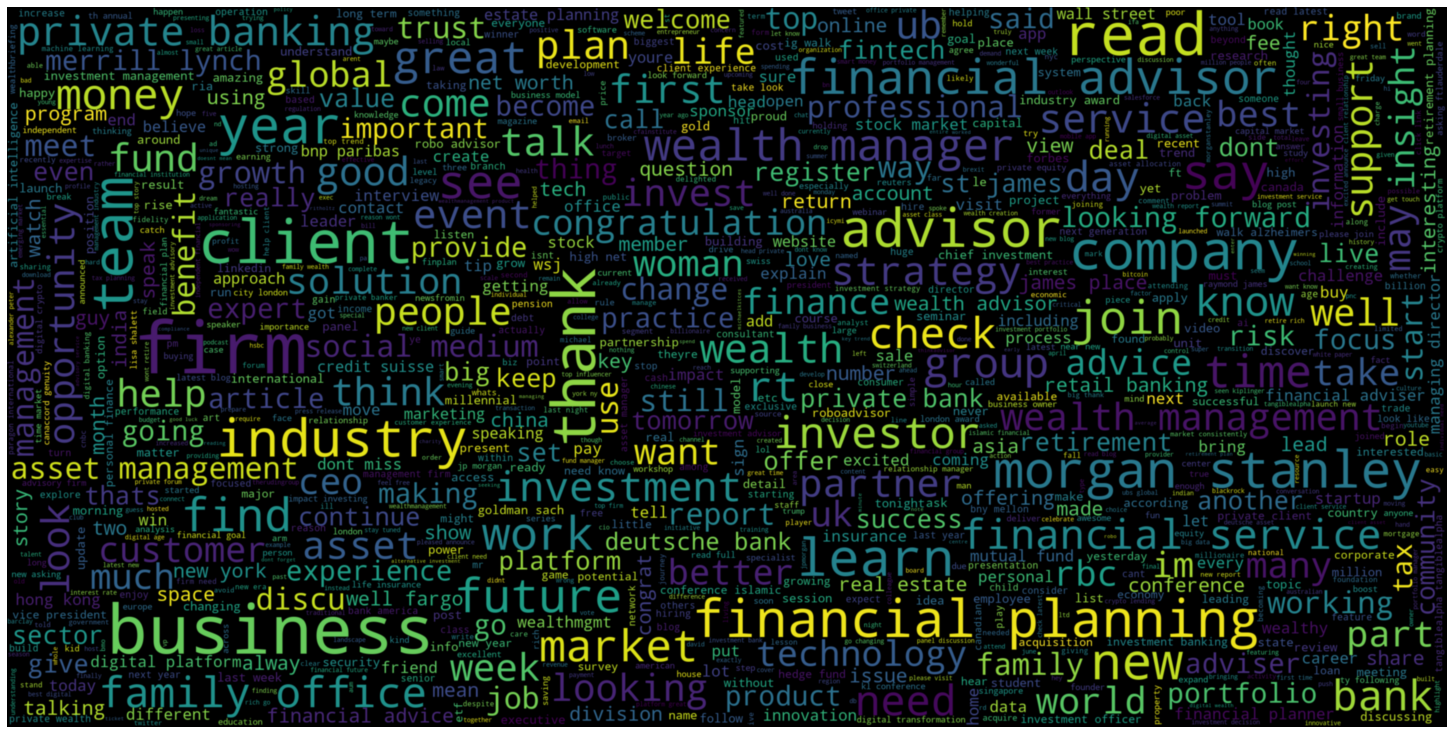

In [23]:
DP.wordcld(unigrams) #input must be unigrams

In [120]:
import json
import nltk
import numpy as np

nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
import re
from nltk.stem.snowball import SnowballStemmer
from gensim.parsing.preprocessing import STOPWORDS
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Iterable


class Data_Processor:

    def __init__(self, start_month='2010-06', end_month='2020-06', template=["/Users/ethan_bao/Wealth_Management"],
                 tokenizer=TweetTokenizer(strip_handles=True, reduce_len=True), stemmer=nltk.stem.porter.PorterStemmer,
                 lemma=nltk.wordnet.WordNetLemmatizer):
        self._S_m = start_month
        self._E_m = end_month
        self._D_list = self.datelist()
        self._Dir = template
        self.data = []
        self._text = {}
        self._Lens = []
        self._tokenizer = tokenizer
        self._stemmer = stemmer()
        self._lemma = lemma()
        self._stopwords = set(nltk.corpus.stopwords.words('english')).union(
            set(['http', 'via', 'ha', 'We', 'I', 'make', 'today', 'A', 'the', 'http', 'one', 'This', 'LLC', 'Inc']))
        self._unigrams = []

    def datelist(self):
        start_year = int(self._S_m[:4])
        start_month = int(self._S_m[-2:])
        end_year = int(self._E_m[:4])
        end_month = int(self._E_m[-2:])
        if start_year == end_year:
            month_range = range(start_month, end_month + 1)
            date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in month_range]
            return date_list
        year_range = range(start_year + 1, end_year)
        start_year_month_range = range(start_month, 13)
        end_year_month_range = range(1, end_month + 1)
        date_list = ["{year}-{month:0=2d}".format(year=str(start_year), month=M) for M in start_year_month_range]
        date_list += ["{year}-{month:0=2d}".format(year=str(Y), month=M) for Y in year_range for M in range(1, 13)]
        date_list += ["{year}-{month:0=2d}".format(year=str(end_year), month=M) for M in end_year_month_range]
        return date_list

    def readdata(self):
        for date in self._D_list:
            month=[]
            for key in self._Dir:
                with open("{dir}{D}.json".format(dir=key, D=date), "r") as read_file:
                    temp=json.load(read_file)
                    month+=temp
            self._M_data.append(month)
        self._recalc()


    def datanums(self):
        return self._Lens, sum(self._Lens)

    def specifylang(self, lang='"en"'):
        self._M_data = [[_ for _ in D if
                         _['text_html'][
                         _['text_html'].find('lang='):_['text_html'].find('lang=') + 9] == 'lang=' + lang]
                        for D in self._M_data]
        self._recalc()

    @property
    def data(self):
        return self._M_data

    @data.setter
    def data(self, data):
        self._M_data = data
        self._recalc()


    def textdata(self):
        return self._text

    def getngrams(self, data=float('inf'), num=1, lemma=True, stem=False):
        if data==float('inf'):
            return [[self._extract_ngrams(_, num, lemma, stem) for _ in M] for nonuse,M in self._text.items()]
        else:
            return self._extract_ngrams(data, num, lemma, stem)

    def getfreq(self, ngrams):
        words_freq = {}
        for month in ngrams:
            for text in month:
                for token in text:
                    if token not in words_freq.keys():
                        words_freq[token] = 1
                    else:
                        words_freq[token] += 1
        words_freq_list = list(words_freq.items())
        words_freq_list = sorted(words_freq_list, key=lambda x: x[1], reverse=True)
        return words_freq_list

    def wordcld(self, ngrams, Width=3200, Height=1600, Max_Font_Size=160, Max_Words=1000):
        sentence = ' '.join([' '.join([' '.join(T) for T in month]) for month in ngrams])
        wordcloud = WordCloud(width=Width, height=Height, max_font_size=Max_Font_Size, stopwords=STOPWORDS,
                              max_words=Max_Words).generate(
            sentence)
        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud, interpolation='bicubic')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

    def addstopwords(self, words):
        addon = [i for i in words]
        self._stopwords += addon

    def removenoise(self):
        temp = []
        other = []
        for data in self._M_data:
            temp.append([])
            other.append([])
            for i in data:
                if i['retweets'] > 0 or i['likes'] > 0 or i['is_replied'] or i['is_reply_to'] or i['replies']:
                    temp[-1].append(i)
                else:
                    other[-1].append(i)
        self._M_data = temp
        self._recalc()
        return other

    def clean(self):
        self._remove_link()
        self._remove_sign()
        self._dejob()
        self._remove_dup()
        self._recalc()

    def tfidf(self, ngrams):
        T = [[' '.join(T) for T in month] for month in ngrams]
        R = []
        for i in T:
            R += i
        tfidf = TfidfVectorizer(min_df=0.005, max_df=0.5, ngram_range=(1, 2))
        features = tfidf.fit_transform(R)
        DF = pd.DataFrame(
            features.todense(),
            columns=tfidf.get_feature_names()
        )
        return DF

    def tokenizetext(self,Lemma=True):
        for month,data in self._text.items():
            data=[' '.join(self.getngrams(data=_,num=1,lemma=Lemma)) for _ in data]
            self._text[month]=data
            
    def _remove_link(self):
        for month in self._M_data:
            for twt in month:
                if '/' in twt['text']:
                    result = re.sub(r"(https|http)\S+", "", twt['text'])
                    # result=re.sub(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','',i['text'])
                    result = re.sub(r"\S+\.com\S+", "", result)
                    twt['text'] = result

    def _recalc(self):
        self._Lens = []
        for i in self._M_data:
            self._Lens.append(len(i))
        self._text={}
        for i in range(len(self._M_data)):
            self._text[self._D_list[i]]=[_['text'] for _ in self._M_data[i]]

    def _dejob(self):
        self._M_data = [[_ for _ in D if
                         'job' not in _['username'].lower()]
                        for D in self._M_data]

    def _remove_sign(self):
        for month in self._M_data:
            for twt in month:
                # hash tag
                result = re.sub(r'#\S+', '', twt['text'])
                result = re.sub(r'.ealth .anagement', '', result)
                # user mention
                # result=re.sub(r'#\S+', '', result)
                # emoji
                result = re.sub(r'[^\x00-\x7F]+', '', result)
                # html tags
                result = re.sub(r'<.*?>', '', result)
                # extra spaces
                result = re.sub(r' +', ' ', result)
                # punctuation
                from string import punctuation as punc
                result = re.sub('[{}]'.format(punc), '', result)
                result = ''.join([i for i in result if i.isnumeric() == False])
                twt['text'] = result

    def _extract_ngrams(self, data, num, lemma=False, stem=False):
        tokens = self._tokenizer.tokenize(data)
        token_lower = [token.lower() for token in tokens if token not in self._stopwords]
        token_stop = [token for token in token_lower if token not in self._stopwords]

        if stem:
            token_stop_stem = [self._stemmer.stem(token) for token in token_stop]
            token_stop_stem_alnum = [word for word in token_stop_stem if word.isalnum()]
            n_grams = ngrams(token_stop_stem_alnum, num)

        if lemma:
            token_stop_lemma = [self._lemma.lemmatize(token) for token in token_stop]
            token_stop_lemma_alnum = [word for word in token_stop_lemma if word.isalnum()]
            n_grams = ngrams(token_stop_lemma_alnum, num)

        return [''.join(grams) for grams in n_grams]

    def _remove_dup(self):
        D = self._M_data
        for m in D:
            removed_index = []
            for i in range(len(m)):
                for j in range(i + 1, len(m)):
                    if m[i]['tweet_id'] == m[j]['tweet_id']:
                        removed_index.append(j)
            for ele in sorted(removed_index, reverse=True):
                del m[ele]
        self._M_data = D


def clean(Data):
    def C(string):
        result = re.sub(r"(https|http)\S+", "", string)
        result = re.sub(r"\S+\.com\S+", "", result)
        result = re.sub(r'#\S+', '', result)
        result = re.sub(r'.ealth .anagement', '', result)
        result = re.sub(r'[^\x00-\x7F]+', '', result)
        result = re.sub(r'<.*?>', '', result)
        result = re.sub(r' +', ' ', result)
        from string import punctuation as punc
        result = re.sub('[{}]'.format(punc), '', result)
        result = ''.join([i for i in result if i.isnumeric() == False])
        return result

    if isinstance(Data[0], str):
        for i in range(len(Data)):
            Data[i] = C(Data[i])
    else:
        for m in range(len(Data)):
            for i in range(len(Data[m])):
                Data[m][i] = C(Data[m][i])

    return Data



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ethan_bao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ethan_bao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ethan_bao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
